# Univariate Time Series

Based on:

- https://onlinecourses.science.psu.edu/stat510/book/export/html/661

Formally: 

> A **univariate time series** is a sequence of measurements of the same variable collected over time. Most often, the measurements are made at regular time intervals.

Then **univariate time series**, or just a **time series** is a sequence taken at successive equally spaced points in time.

$$ \{ S_{n} \} = \{ S \; (n \; \Delta t) \}$$

$$ S_{0} = S \; (0 \; * \; \Delta t) $$

$$ S_{1} = S \; (1 \; * \; \Delta t) $$

$$ S_{2} = S \; (2 \; * \; \Delta t) $$

$$ ... $$


![Time series example 1](img/time_series_ex1.png)

The time interval $\Delta t$ at which measurements are taken is named **sampling interval**, and the total time $T$ at which measurements are taken is named **observation time**.

### Note:

> A **time series** is a list of observations where the ordering matters.

Ordering is very important because there is dependency and changing the order could change the meaning of the data.

## First remember ...

> **Linear paradigm:** "*Small cuases lead to small effects*"

**Linear equations** can only lead to exponentially decaying (or growing) or (damped) periodically oscillating solutions.

![Linear systems behaviour](img/linear_systems.png)

So, if one has any irregular behaviour and we assume that the system behaves linearly, then it has to be atributted to some random external input to the system:

$$ S_{n} = x_{n} + \eta_{n} $$


> **Chaos paradigm**: "*Nonlinear chaotic systems can produce irregular data with purely deterministic equations of motion in an autonomous way, i.e. without time dependent inputs*"


**Nonlinear chaotic systems** have **sensitivity on initial conditions**: *Tiny changes in the input lead to LARGE variations in the output*.

![Nonlinear chaotic systems behaviour](img/dependence_on_initial_conditions.png)

It is important to take into account that the system still being **deterministic** in the sense that the variables behave according to their physical rules, then it is not random, but it is **highly unpredictable** and subject to **vast variations**.

## Time series analysis goals

> We look for signatures of **deterministic nature** of the system

### Important characteristics to consider first

Some important questions to first consider when first looking at a time series are:

- Is there a **trend**?
> On average, the measurements tend to increase (or decrease) over time?

- Is there **seasonality**?
> There is a **regularly repeating pattern** of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?

- Are there **outliers**?
> In regression, outliers are far away from your model. With time series data, your outliers are far away from your other data.

- Is there a **long-run cycle** or period unrelated to seasonality factors?

- Is there **constant variance** over time, or is the **variance non-constant**?

- Are there any **abrupt changes** to either the level of the series or the variance?

# Stationarity

We need to know that the numbers we measure correspond to properties of the studied object, up to some measurement error. 

> **Reproducibility** is closely connected to two different notions of **stationarity**.

## First concept of Stationarity (weakest form)

> Stationarity requires that all parameters that are relevant for a system's dynamics have to be fixed and constant during the measurement period (and these parameters should be the same when the
experiment is reproduced).

- This is a requirement to be fulfilled not only by the experimental set-up but also by the process taking place in this fixed environment.

- If the process under observation is a probabilistic one, it will be characterised by probability distributions for the variables involved. For a stationary process, these probabilities may not depend on time. The same holds if the process is specified by a set of transition probabilities between different states.

- If there are deterministic rules governing the dynamics, these rules must not change during the time covered by a time series.

### Unfortunately ...

... In most cases we do not have direct access to the system which produces a signal and we cannot establish evidence that its parameters are indeed constant.


## Second concept of stationarity (which is based on the available data itself) 

A time series, as any other measurement, has to provide enough information to determine the quantity of interest unambiguously.

This includes the constancy of relevant parameters, but it also requires that phenomena belonging to the dynamics are contained in the time series sufficiently frequently, so that the probabilities or other rules can be inferred properly.

> A signal is called stationary if all joint probabilities of finding the system at some time in one state and at some later time in another state are independent of time within the observation period, i.e. when calculated from the data.

From [Stationary process - Wikipedia](https://en.wikipedia.org/wiki/Stationary_process)

> Stationary process (a.k.a. a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.

### Practical method

A series $x_{n}$ is said to be stationary if it satisfies the following properties:

- The mean is the same for all $n$.
- The variance of $x_{n}$ is the same for all $n$.
- The covariance (and also correlation) between $x_{n}$ and $x_{n-\tau}$ is the same for all $n$.

Where $\tau$ is the **time lag**.

### Remarks

> We deal with the problem of **how non-stationarity can be detected for a given data set**, but obviously stationarity is a property which can never be positively established.

There are many processes which are formally stationary when the limit of infinitely long
observation times can be taken but which behave effectively like non-stationary
processes when studied over finite times, for example: intermittency.

- If the observed signal is quite regular almost all of the time, but contains one very irregular burst every so often, then the time series has to be considered to be non-stationary for our purposes, even in the case where all parameters remained exactly constant but the signal is intermittent.

- Only if the rare events (e.g. the irregular bursts mentioned before) also appear several times in the time series can we speak of an effective independence of the observed joint probabilities and thus of stationarity.

### Note:

Be aware that almost all the methods and results on time series analysis assume the validity of both conditions:

- **The parameters of the system remain constant**.
- **The phenomenon is sufficiently sampled:** the time series should cover a stretch of time which is much longer than the longest characteristic time scale that is relevant for the evolution of the system.

> The concentration of sugar in the blood of a human is driven by the consumption of food and thus roughly follows a 24 hour cycle. If this quantity is recorded over 24 hours or less, the process must be considered
non-stationary no matter how many data points have been taken during that time.

In [1]:
#Librerias para utilizar 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Lorentz_eq2(r, t, rho, sigma, beta): #Atractor de Lorentz
    x, y, z = r
    
    dx = sigma*(y-x)
    dy = x*(rho-z) -y
    dz = x*y - beta*z
    
    return np.array([dx, dy, dz])

def Duffing(r, t, e, g, w): #Oscilador de Duffing 
    x, y, z = r
    
    dx = y
    dy = x - x**3 - e*y +g*np.cos(z)
    dz = w
    
    return np.array([dx, dy, dz])

def VderP2(r, t, A, T2): #Ecuacion de Van der Pol con forzamiento 
    x, y, z = r
    
    dx = y
    dy = (1-x**2)*y - x + A*np.cos(2*np.pi*z)
    dz = 1/T2
    
    return np.array([dx, dy, dz])

def Chua_Circuit(r, t, a, b, m0, m1): # Circuito de Chua
    x, y, z = r
    
    if x >= 1:
        dx = a*(y - m1*x - (m0-m1))
    elif x <= -1:
        dx = a*(y - m1*x + (m0-m1))
    else:
        dx = a*(y - m0*x)
        
    dy = x - y + z
    dz = -b*y
    
    return np.array([dx, dy, dz])

In [3]:
def Get_data(data, window, lagp): #obtiene los datos para arrays de 1 columna
    ''' Inputs: datos en numpy array, ventana de muestreo y lag 
    Outputs: media móvil y varianza móvil en numpy arrays, y la autocorrelación 
    '''
    
    Dat = pd.DataFrame(data, columns=['AA']) #convierte en DataFrame el array 
    meanQ = Dat.rolling(window, min_periods=1).mean() #media móvil
    varQ = Dat.rolling(window, min_periods=1).var() #varianza móvil
    auto_corr = pd.Series(data).autocorr(lag=lagp) #autocorrelación 
    #convirtiendo los datos obtenidos en numpy arrays
    Mean = [ np.array( [ meanQ.iloc[i, 0] ] ) for i in range(0, meanQ.shape[0]) ]
    Var = [ np.array( [ varQ.iloc[i, 0] ] ) for i in range(0, varQ.shape[0]) ]
    x = np.arange(0, meanQ.shape[0])
    
    fig = plt.figure(figsize=(8,4))
    ax0 = fig.add_subplot(121); ax1 = fig.add_subplot(122)
    ax0.plot(x, Mean, '.'); ax1.plot(x, Var, '.')
    ax0.set_ylabel("Media Movil"); ax1.set_ylabel("Varianza Movil")
    fig.tight_layout()
    plt.show()
    
    return (Mean, Var, auto_corr)

In [4]:
def Get_timeseries(f, r0, time, param):
    #numerical solution
    sol = odeint(f, r0, time, args=param)
    x = sol[:,0]; y = sol[:,1]; z = sol[:,2]
    
    return (x, y, z)

In [5]:
qkn = np.genfromtxt('quakes.dat') #importo los datos del archivo - np array

x = np.arange(0, np.shape(qkn)[0])

In [9]:
##------- Datos para atractores
t = np.arange(0, 100, 0.1)
rr0 = np.array([1, 0, 0])

p_lor = (28, 10, 8./3.)
x_lor, y_lor, z_lor = Get_timeseries(Lorentz_eq2, rr0, t, p_lor)

p_duff = (0.15, 0.3, 1.0)
x_duff, y_duff, z_duff = Get_timeseries(Duffing, rr0, t, p_duff)

p_vder = (0.5, 2*np.pi/1.1)
x_vder, y_vder, z_vder = Get_timeseries(VderP2, rr0, t, p_vder)

p_chua = (9, 100/7, -1/7, 2/7)
x_chua, y_chua, z_chua = Get_timeseries(Chua_Circuit, rr0, t, p_chua)

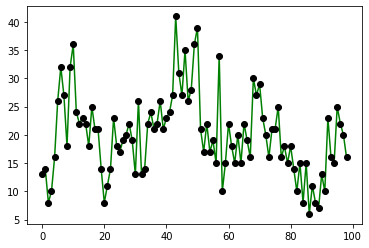

In [7]:
#Graficando los datos
plt.plot(x, qkn, 'g-')
plt.plot(x, qkn, 'ko')

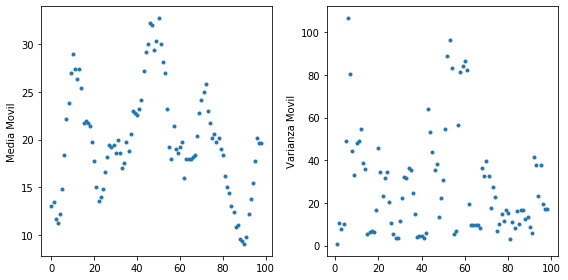

0.5451657930219334


In [15]:
#----- Quakes data
M_quake, V_quake, A_quake = Get_data(qkn, 5, 1)

print(A_quake)

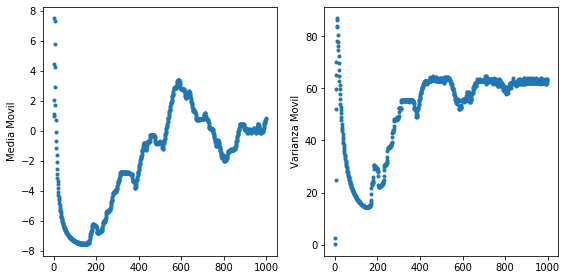

Autocorrelación en x =  0.8812791949915086


In [17]:
#--------- Lorentz data 
M_lor, V_lor, A_lor = Get_data(x_lor, 200, 1)

print("Autocorrelación en x = ", A_lor)

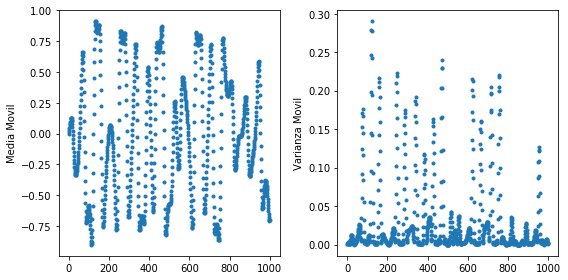

Autocorrelación en y =  0.993727253564663


In [12]:
#----- Duffing data 
M, V, A = Get_data(y_duff, 10, 1)

print("Autocorrelación en y = ", A)

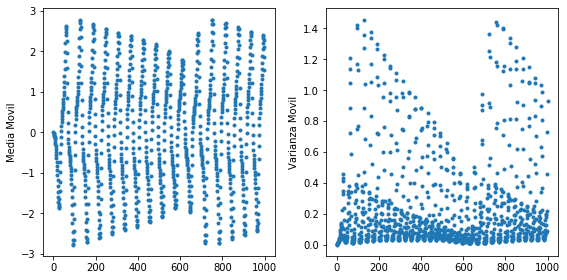

Autocorrelación en y = 0.989266720911848


In [13]:
#------ Van der Pol data
M, V, A = Get_data(y_vder, 8, 1)

print("Autocorrelación en y =", A)

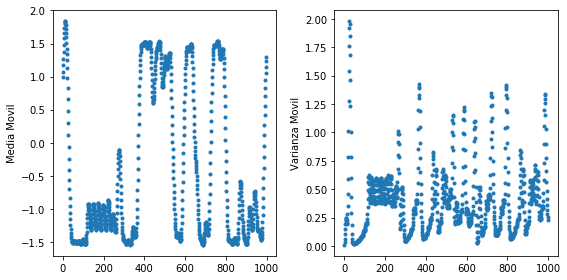

Autocorrelación en x = 0.9934509744570572


In [14]:
#------ Chua Circuit data 
M, V, A = Get_data(x_chua, 20, 1)

print("Autocorrelación en x =", A)